In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [162]:
data=pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [163]:
print (data.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


c:\python37\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


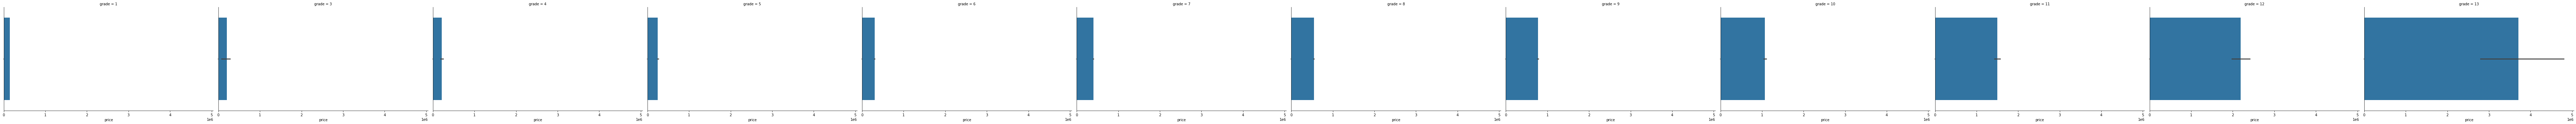

In [164]:
g=sns.FacetGrid(data,col='grade',aspect=1.7,height=5)
g.map(sns.barplot,'price') 

## Here we can notice that the grad have a lineaire impact on the price the higher the grade the higher the price

c:\python37\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


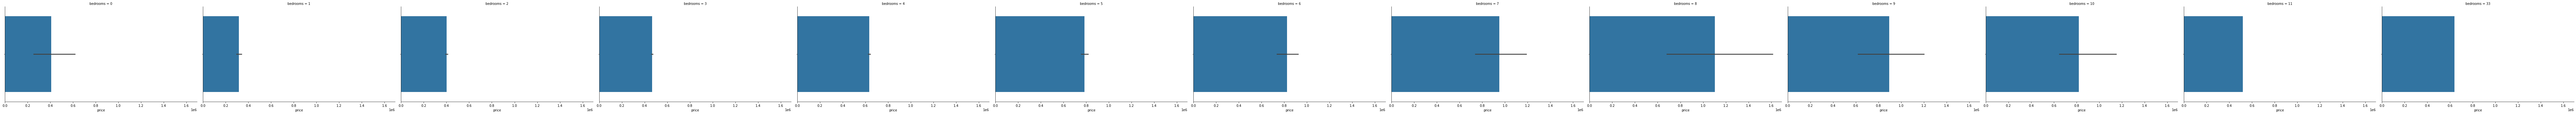

In [165]:
b=sns.FacetGrid(data,col='bedrooms',aspect=1.7,height=5)
b.map(sns.barplot,'price') 

## In theory the bedroom number should impact the most with the house price although this is not the case here wiche lead me to first check the coorelation with the lon/lat to determine the location first


In [166]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data["long"]=scaler.fit_transform(data[["long"]].values)
data["lat"]=scaler.fit_transform(data[["lat"]].values)
data1=data[['long','price']].groupby(['price'],as_index=True).max()
data1.head(4028)

,long
price,
75000.0,2.186375
78000.0,-0.469402
80000.0,2.165072
81000.0,-0.717937
82000.0,-0.902564
...,...
5350000.0,-0.043342
5570000.0,-0.135655
6885000.0,-0.185362


In [167]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 22 , 15 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

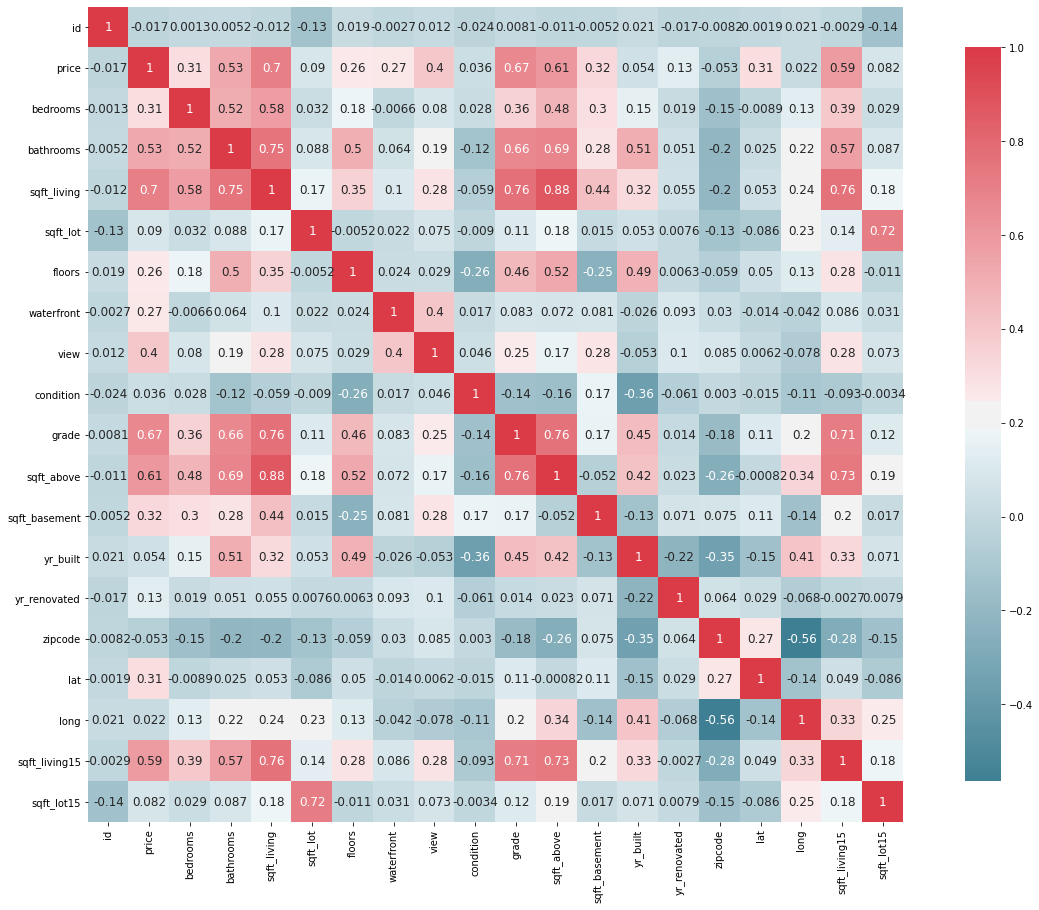

In [91]:
plot_correlation_map (data)

## Based on this correlation map the most features related to price , in other words there correlation exced 0.5 are : 
# sqft_living
# grade
# sqft_above
# sqft_living15
# bathrooms 


# Lineair Regression

In [168]:
x=data[["sqft_living"]] 
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40)

MSE 62451720102.95401
R squared 0.503553575115109


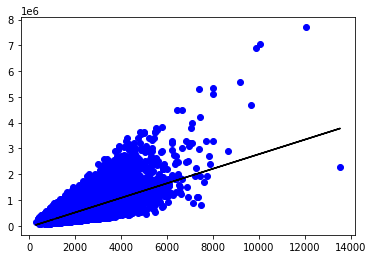

In [180]:
model=LinearRegression() 
model.fit(x_train,y_train) 
predicted=model.predict(x_test)
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))
plt.scatter(x,y,color="b")
plt.plot(x,model.predict(x),color="k") 

# MultiRegression 

In [170]:
x=data[["sqft_living","grade","sqft_above","sqft_living15","bathrooms"]] 
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40)

In [171]:
model=LinearRegression() 
model.fit(x_train,y_train) 
predicted=model.predict(x_test)

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 55960730384.97108
R squared 0.5551522922384312


# The polynomial Multi Inputs 

In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
x= data[["sqft_living","grade","sqft_above","sqft_living15","bathrooms"]]
y= data["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=40)
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)
x_train_fit = poly.fit_transform(x_train) 
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  49882920293.782104
R squared:  0.6034665273936188


# The polynomial Single Inputs 

MSE:  59007113527.66322
R squared:  0.5309357291473598


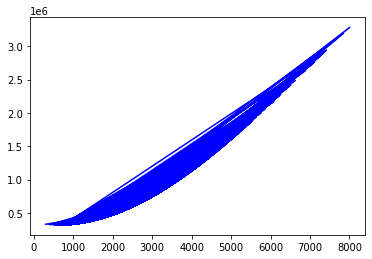

In [173]:
x= data[["sqft_living"] ]
y= data["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=40)
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train)
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))
plt.plot(x_test, predicted, color="b") 

# As we can see Polynomial regression with Multi Inputs present the best performance  